# Gráfica asociada a datos

**Nombre:** Heriberto Espino Montelongo

**Materia:** Análisis Discreto

**Clave:** O24-LDS1011-1

**Fecha:** 4 de diciembre de 2024

#### Contenido de la actividad

El siguiente archivo consiste de un conjunto $D$ de 145 pacientes, filas, cada uno puede ser representado como un punto en $\R^5$, omitiendo las columnas de "Patient number" y "Clinical Classification". Realice un programa para construir la gráfica $G_r(D)=(V,E)$ en donde los vértices son los elementos de $D$ y dados $p_i, p,j \in D$, $(p_i, p,j) \in E$ si y sólo si su distancia es menor que $r$, donde $r > 0$.

Diabetes.csv


Sugerencia: Puede definir la matriz $D=(d_{ij})$ de distancias, donde $d_{ij} = ||p_i - p_j||$.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
r = 50

In [3]:
df = pd.read_csv('Diabetes.csv')
data = df.iloc[:, 1:6].values

In [19]:
def graph(data, r):

    dist_matrix = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            dist_matrix[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    G = nx.Graph()

    for i in range(len(data)):
        G.add_node(i)

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if dist_matrix[i, j] < r:
                G.add_edge(i, j)

    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True, node_size=300, node_color='#061A74', font_size=6, font_color='white', font_weight='bold', font_family='Century Gothic', edge_color='black', linewidths=0.5, width=0.5)
    plt.title(f'\nG_r(D), r = {r}', fontsize=20, color='black', pad=20, fontweight='bold', fontname='Century Gothic')
    plt.show()

    return G

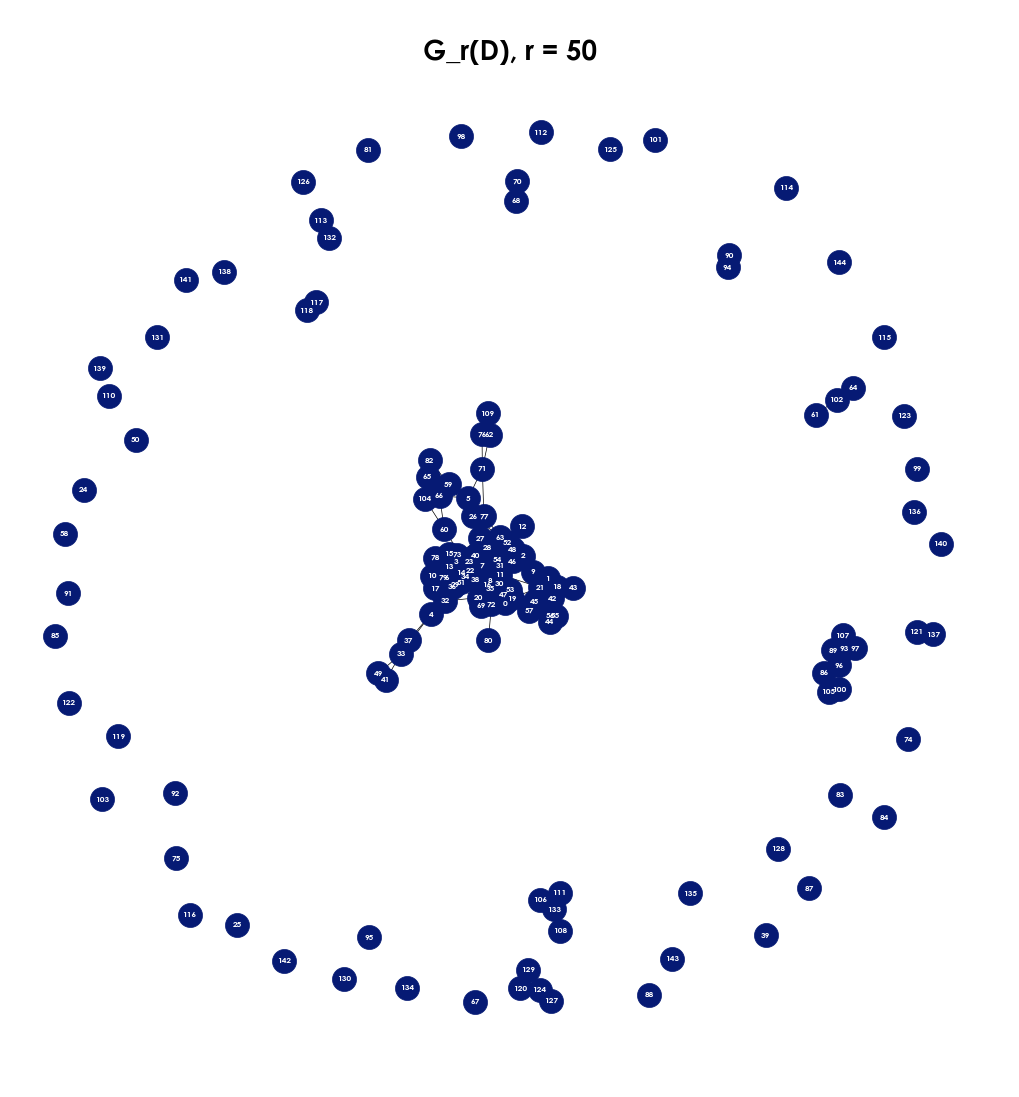

In [20]:
G = graph(data, r)

### **Sin usar nx**

In [228]:
class CustomGraph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}

    def add_node(self, node):
        self.nodes.add(node)
        if node not in self.edges:
            self.edges[node] = []

    def add_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            self.edges[node1].append(node2)
            self.edges[node2].append(node1)

    def get_edges(self):
        edge_list = []
        for node in self.edges:
            for neighbor in self.edges[node]:
                if (neighbor, node) not in edge_list:
                    edge_list.append((node, neighbor))
        return edge_list

    def __str__(self):
        return f"Nodes: {self.nodes}\nEdges: {self.get_edges()}"

In [229]:
def create_custom_graph(data, r):

    dist_matrix_manual = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            dist_matrix_manual[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    G = CustomGraph()

    for i in range(len(data)):
        G.add_node(i)

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if dist_matrix_manual[i, j] < r:
                G.add_edge(i, j)

    print(G)
    return G

In [230]:
G = create_custom_graph(data, r)

Nodes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144}
Edges: [(0, 16), (0, 19), (0, 20), (0, 30), (0, 35), (0, 45), (0, 47), (0, 53), (0, 57), (0, 72), (1, 2), (1, 9), (1, 18), (1, 21), (1, 42), (1, 45), (2, 9), (2, 31), (2, 46), (2, 48), (2, 52), (2, 54), (2, 63), (3, 6), (3, 13), (3, 15), (3, 22), (3, 23), (3, 27), (3, 29), (3, 34), (3, 40), (3, 73), (3, 78), (3, 79), (4, 6), (4, 29), (4, 33), (4, 37), (4, 51), (5, 26), (5, 2

## **Warshall**

In [22]:
def warshall(V, R):

    n = len(V)

    M = np.zeros((n, n), dtype=bool)
    for (i, j) in R:
        M[i-1][j-1] = True
    
    C = M.copy()
    CP = C.copy()
    
    iteracion = 1
    cambio = True
    
    while iteracion <= n and cambio:
        cambio = False
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    CP[i][j] = CP[i][j] or (C[i][k] and M[k][j])
                    cambio = cambio or (C[i][j] != CP[i][j])
        C = CP.copy()
        iteracion += 1
    
    C = C.astype(int)
    
    return C

In [30]:
V = list(G.nodes())
E = G.edges()

In [24]:
cerradura_trans = warshall(V, E)
print(warshall)

<function warshall at 0x00000270370BFF60>


In [25]:
np.savetxt('diabetes-w.csv', cerradura_trans, fmt='%d', delimiter='  ')

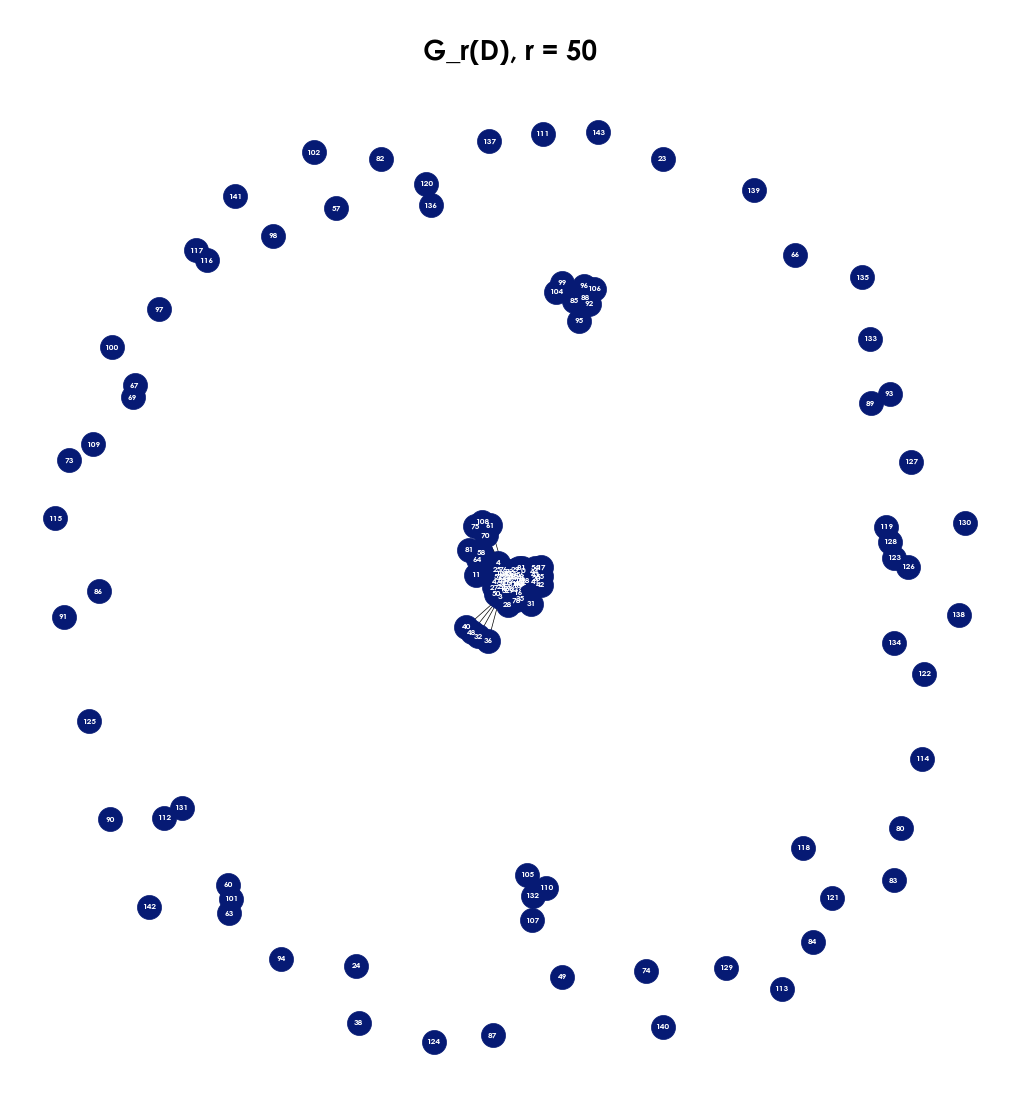

In [ ]:
G = nx.from_numpy_array(cerradura_trans)

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=300, node_color='#061A74', font_size=6, font_color='white', font_weight='bold', font_family='Century Gothic', edge_color='black', linewidths=0.5, width=0.5)
plt.title(f'\nG_r(D), r = {r}', fontsize=20, color='black', pad=20, fontweight='bold', fontname='Century Gothic')
plt.show()